# Online Course User Engagement Statistics and Visualizations

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the cleaned dataset

In [139]:
df = pd.read_csv("data/clean/online_course_engagement_data_cleaned.csv")

### This dataset contains data on online course user engagement

In [140]:
print("The columns and their data types:\n", df.dtypes)

The columns and their data types:
 User_ID                       int64
Course_Category              object
Time_Spent_On_Course        float64
Number_Of_Videos_Watched      int64
Number_Of_Quizzes_Taken       int64
Quiz_Scores                 float64
Completion_Rate             float64
Device_Type                   int64
Course_Completion             int64
Device_Type_Label            object
Course_Completion_Label      object
dtype: object


## A explanation of our columns and the data they represent

### User_ID                       int64
Each user has a unique ID number
### Course_Category              object
Category of course subject matter (Health, arts, science, programming, or business
### Time_Spent_On_Course        float64
Amount of time (in hours) that the user has spent on the course
### Number_Of_Videos_Watched      int64
Total number of the videos the user has watched
### Number_Of_Quizzes_Taken       int64
Total number of quizzes the user has taken
### Quiz_Scores                 float64
Average percentage of all the user's quiz scores
### Completion_Rate             float64
Percentage of the course content the user has completed
### Device_Type                   int64
0 if the user used a desktop device, and 1 if the user used a mobile device
### Course_Completion             int64
1 if the user has completed the course, and 0 if not
### Device_Type_Label            object
Label for the device type ("Desktop" or "Mobile)
### Course_Completion_Label      object
Label for course completion value ("Completed" or "Not Completed")

## Set Seaborn theme

In [141]:
sns.set_theme()

## Completion Rate by Device Type

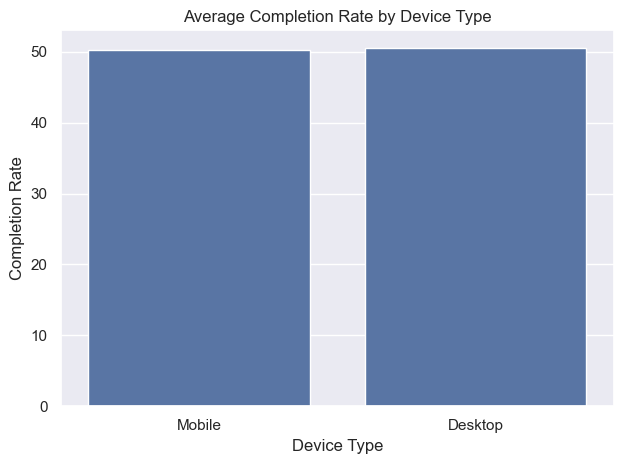

In [142]:
sns.barplot(data=df, x='Device_Type_Label', y='Completion_Rate', errorbar=None)
plt.title("Average Completion Rate by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Completion Rate")
plt.tight_layout()
plt.show()

## Average Quiz Scores by Course Category

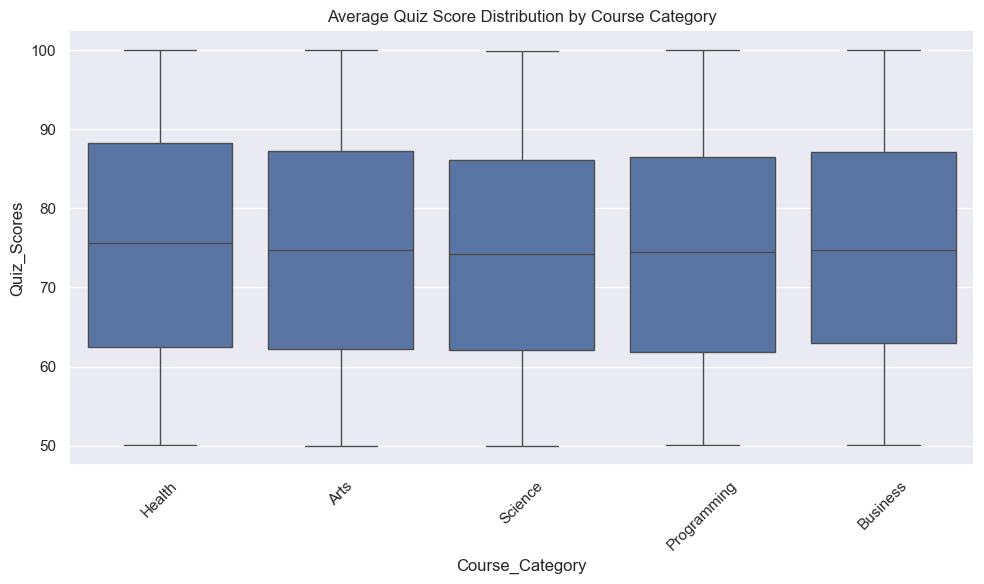

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x='Course_Category', y= 'Quiz_Scores')
plt.title("Average Quiz Score Distribution by Course Category")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Videos Watched vs Completion

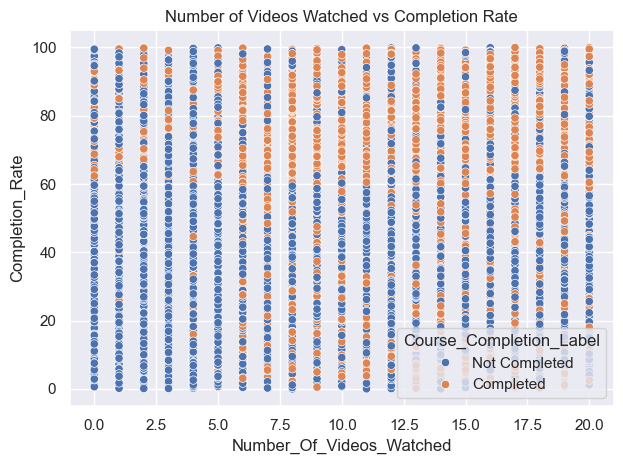

In [144]:
sns.scatterplot(data = df, x='Number_Of_Videos_Watched', y='Completion_Rate', hue='Course_Completion_Label')
plt.title("Number of Videos Watched vs Completion Rate")
plt.tight_layout()
plt.show()

## Heatmap of Correlations

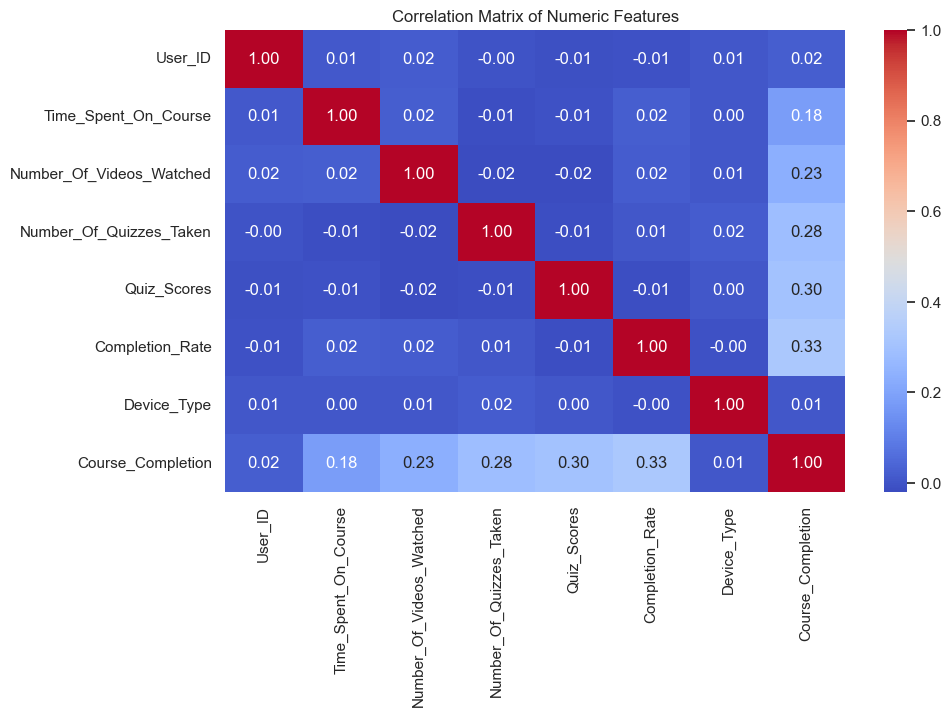

In [145]:
# only use numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## Completion Rate vs. Number of Videos Watched (Line Plot)

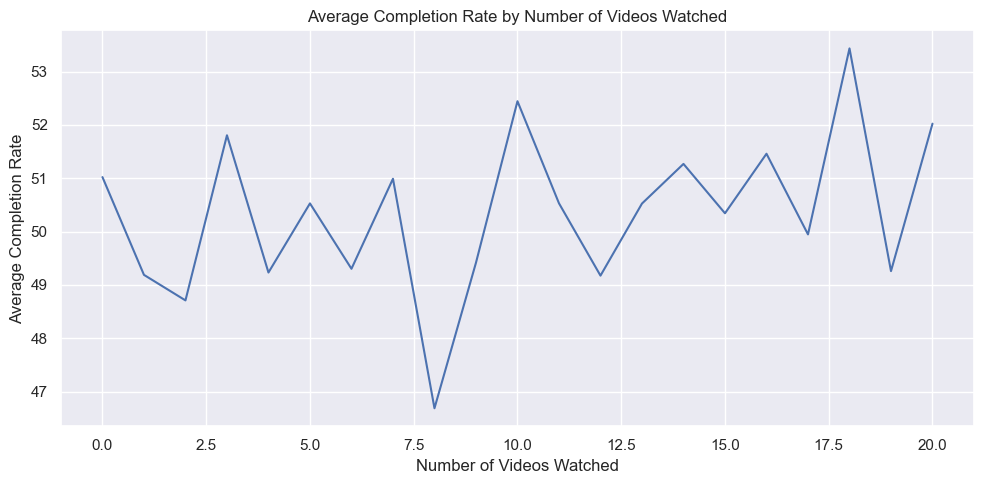

In [146]:
# Group by videos watched and compute average completion
grouped = df.groupby('Number_Of_Videos_Watched')['Completion_Rate'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='Number_Of_Videos_Watched', y = 'Completion_Rate')
plt.title("Average Completion Rate by Number of Videos Watched")
plt.xlabel("Number of Videos Watched")
plt.ylabel("Average Completion Rate")
plt.tight_layout()
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features to use
features = [
    'Time_Spent_On_Course',
    'Number_Of_Videos_Watched',
    'Number_Of_Quizzes_Taken',
    'Quiz_Scores',
    'Completion_Rate',
    'Device_Type'
]

# Target variable
target = 'Course_Completion'

# Create X and Y
x = df[features]
y = df[target]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create and fit model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Predict
y_pred = model.predict(x_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1068
           1       0.76      0.70      0.73       732

    accuracy                           0.79      1800
   macro avg       0.78      0.77      0.78      1800
weighted avg       0.79      0.79      0.79      1800

Confusion Matrix:
 [[909 159]
 [223 509]]


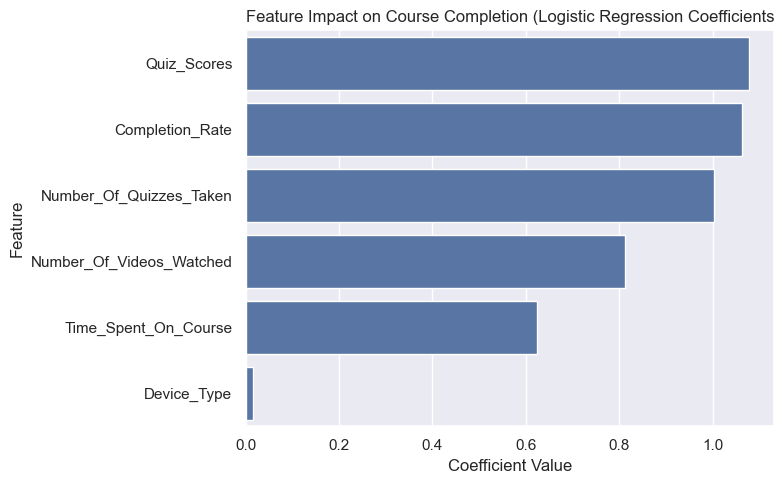

In [149]:
# Feature importance (sorted)
importance = pd.Series(model.coef_[0], index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Impact on Course Completion (Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [150]:
print(df['Course_Completion'].value_counts())
print(df['Course_Completion_Label'].value_counts())

Course_Completion
0    5432
1    3568
Name: count, dtype: int64
Course_Completion_Label
Not Completed    5432
Completed        3568
Name: count, dtype: int64


Random Forest Accuracy: 0.9566666666666667


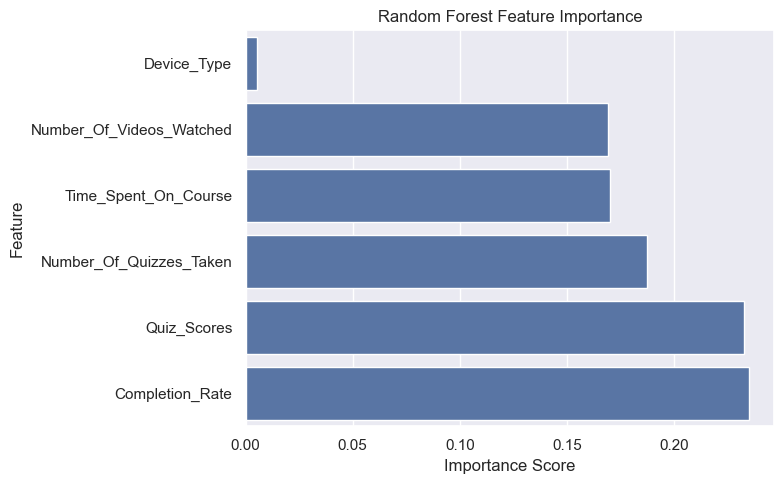

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convert to DataFrame (needed if x_train and x_test are Numpy arrays
x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_df, y_train)

# Predict
rf_preds = rf_model.predict(x_test_df)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Feature importance
rf_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_importance.values, y=rf_importance.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

 99%|===================| 3569/3600 [01:52<00:00]        

<Figure size 640x480 with 0 Axes>

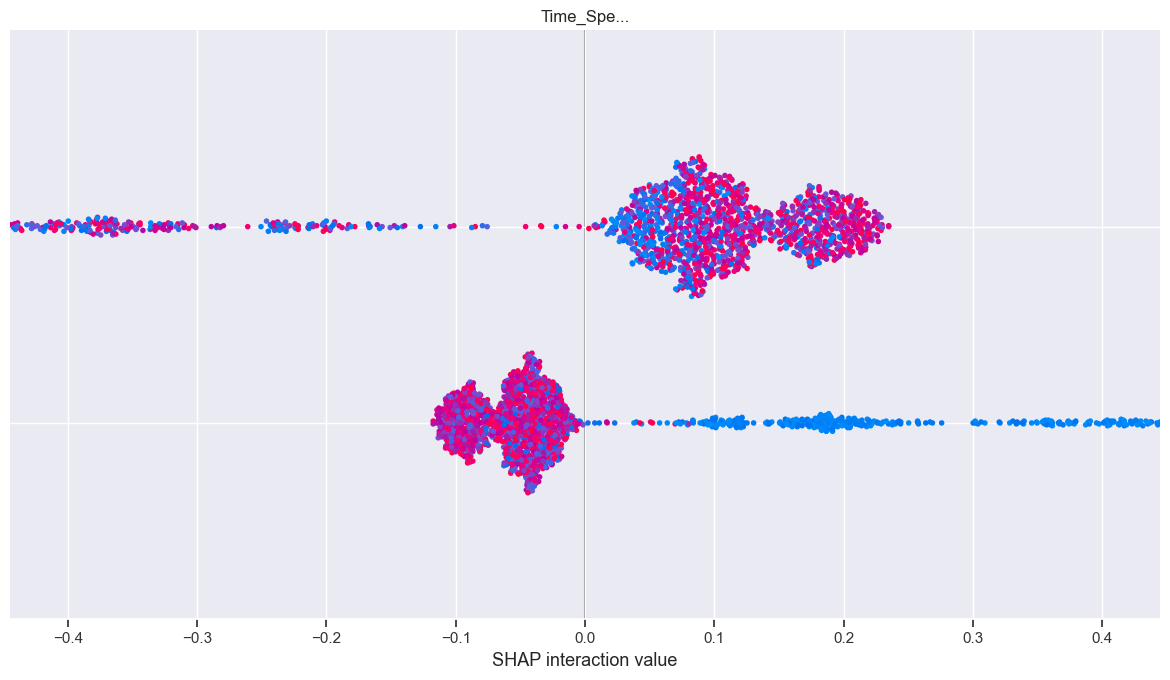

In [152]:
import shap

# Use TreeExplainer for tree-based models like Random Forest
explainer = shap.Explainer(rf_model, x_train_df)
shap_values = explainer(x_test_df)

# Summary plot
shap.summary_plot(shap_values, x_test_df)

## Preparing final dataset for Power BI

In [158]:
# Bin number of videos watched
df['Videos_Watched_Bin'] = pd.cut(
    df['Number_Of_Videos_Watched'],
    bins=[-1, 5, 10, 15, 20],
    labels=['0–5', '6–10', '11–15', '16–20']
)

# Bin time spent on course
df['Time_Spent_Bin'] = pd.cut(
    df['Time_Spent_On_Course'],
    bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    labels=['0-10 hrs', '10–20 hrs', '20–30 hrs', '30–40 hrs', '40-50 hrs', '50-60 hrs', '60-70 hrs', '70-80 hrs', '80-90 hrs', '90-100 hrs']
)

In [159]:
df.rename(columns={
    'Course_Category': 'Course Category',
    'Quiz_Scores': 'Quiz Scores',
    'Completion_Rate': 'Completion Rate',
    'Device_Type_Label': 'Device Type',
    'Course_Completion_Label': 'Course Completion',
    'Videos_Watched_Bin': 'Videos Watched (Grouped)',
    'Time_Spent_Bin': 'Time Spent (Grouped)'
}, inplace=True)

In [160]:
df.to_csv("data/final/online_course_engagement_data_final.csv", index=False)
print("✅ Final dashboard dataset saved to data/final/")

✅ Final dashboard dataset saved to data/final/


In [156]:
print(df['Number_Of_Videos_Watched'].max())

20


In [157]:
print(df['Time_Spent_On_Course'].max())

99.99255785648448
